In [1]:
#conda install -c conda-forge wordcloud
import json
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
listings_json = json.load(open("../data/craigslist.json"))
aggregated_json = json.load(open("../data/aggregated.json"))

In [3]:
craigslist = pd.DataFrame(listings_json)
aggregated = pd.DataFrame(aggregated_json)

In [4]:
craigslist.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095,2.0,1.0,876,None,None,1,1,1,[],apartment,None,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000,4.0,2.5,2000,None,None,1,1,1,[],house,None,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695,3.0,2.0,0,None,None,1,0,1,[],apartment,None,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385,1.0,1.0,800,None,None,1,1,1,[],apartment,None,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185,1.0,1.0,800,None,None,1,1,1,[],apartment,None,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...


In [5]:
craigslist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2990 entries, 0 to 2999
Data columns (total 15 columns):
address          2395 non-null object
price            2990 non-null int64
bed              2819 non-null float64
bath             2819 non-null float64
area             2990 non-null int64
company          4 non-null object
neighborhood     0 non-null object
laundry          2990 non-null int64
pets             2990 non-null int64
parking          2990 non-null int64
utilities        2990 non-null object
property_type    2870 non-null object
year_built       0 non-null object
description      2990 non-null object
images           2990 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 373.8+ KB


In [6]:
aggregated[['price','bath']].corr()

,price,bath
price,1.000000,0.340268
bath,0.340268,1.000000


In [7]:
def make_int(area):
    if(area==None or isinstance(area,str)):
        return 0
    else:
        return area
aggregated.info()
aggregated['area'] = aggregated['area'].apply(make_int)
aggregated['bed'] = aggregated['bed'].apply(make_int)
aggregated[['area','bed']].corr()
housingbar = aggregated.groupby('property_type').mean()
aggregated.groupby('property_type').count().head()
trainNeighborhood = pd.crosstab(aggregated.property_type, aggregated.neighborhood)

<class 'pandas.core.frame.DataFrame'>
Index: 9374 entries, 0 to 9373
Data columns (total 15 columns):
address          8779 non-null object
price            7818 non-null float64
bed              9203 non-null object
bath             9203 non-null float64
area             6468 non-null object
company          3930 non-null object
neighborhood     2520 non-null object
laundry          7302 non-null float64
pets             7302 non-null float64
parking          7302 non-null float64
utilities        9374 non-null object
property_type    9246 non-null object
year_built       3237 non-null float64
description      9374 non-null object
images           9374 non-null object
dtypes: float64(6), object(9)
memory usage: 1.1+ MB


In [8]:
def clean_description(description):
    return description.strip("QR Code Link to This Post").strip()

In [9]:
def get_bed_baths(tags):
    br_ba_re = re.compile(r"(?P<beds>\d+)BR \/ (?P<baths>\d+\.?\d?)Ba")
    for tag in tags:
        match = br_ba_re.match(tag)
        if match:
            return match.group("beds"), match.group("baths")

In [10]:
def get_app_fee(tags):
    app_fee_re = re.compile(r"application fee details: \$(?P<fee>\s*\d+\.?\d{0,2})")
    for tag in tags:
        match = app_fee_re.match(tag)
        if match:
            return match.group("fee")

In [11]:
def get_square_footage(tags):
    sq_ft_re = re.compile(r"(?P<sqft>\d+)ft2")
    for tag in tags:
        match = sq_ft_re.match(tag)
        if match:
            return match.group("sqft")

In [14]:
from sklearn.preprocessing import StandardScaler
def make_int(area):
    if(area==None or isinstance(area,str) or np.isnan(area)):
        return 0
    else:
        return area
aggregated.info()
aggregated['area'] = aggregated['area'].apply(make_int)
aggregated['bed'] = aggregated['bed'].apply(make_int)
aggregated['bath'] = aggregated['bath'].apply(make_int)
aggregated['price'] = aggregated['price'].apply(make_int)
features = ['price', 'bed', 'bath','area']
x = aggregated.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = aggregated.loc[:,['neighborhood']].values
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, aggregated[['neighborhood']]], axis = 1)

<class 'pandas.core.frame.DataFrame'>
Index: 9374 entries, 0 to 9373
Data columns (total 15 columns):
address          8779 non-null object
price            9374 non-null float64
bed              9374 non-null float64
bath             9374 non-null float64
area             9374 non-null float64
company          3930 non-null object
neighborhood     2520 non-null object
laundry          7302 non-null float64
pets             7302 non-null float64
parking          7302 non-null float64
utilities        9374 non-null object
property_type    9246 non-null object
year_built       3237 non-null float64
description      9374 non-null object
images           9374 non-null object
dtypes: float64(8), object(7)
memory usage: 1.5+ MB


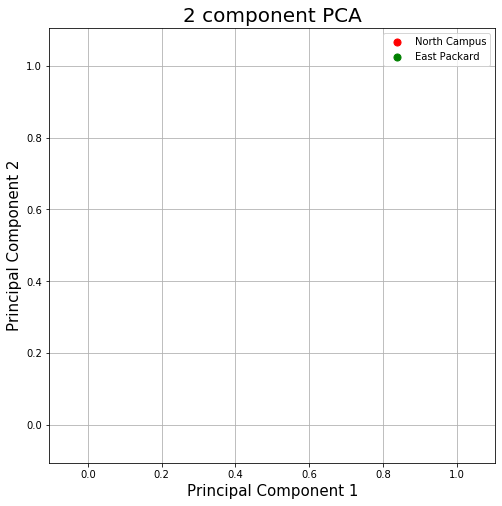

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['North Campus', 'East Packard']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['neighborhood'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
craigslist.columns

Index(['address', 'price', 'bed', 'bath', 'area', 'company', 'neighborhood',
       'laundry', 'pets', 'parking', 'utilities', 'property_type',
       'year_built', 'description', 'images'],
      dtype='object')

In [16]:
craigslist['description']

0       This bedroom apartments includes:\n\n→ Contemp...
1       Stunning Ann Arbor home, perfect family house ...
2       AWESOME Affordable. This stunning 3 bedroom, 1...
3       Have you heard about our Stars & Stripes progr...
4       Have you heard about our Stars & Stripes progr...
                              ...                        
2995    Orion NorthStar    show contact info\n  Unit D...
2996    Centrally located, spacious floorplan, huge ki...
2997    Great Amenities:\n*No Smoking\n*Sparkling Swim...
2998    Lynden ParkeWe're located at: 2224 Golfside Dr...
2999    Take over our lease ("Lease Modification"), en...
Name: description, Length: 2990, dtype: object

In [17]:
craigslist['description'][0]

'This bedroom apartments includes:\n\n→ Contemporary kitchen complete with Whirlpool appliances including quiet cycle dishwasher, glass cooktop stove, frost-free refrigerator and above-range microwave!\n→ Bathroom features Hollywood lighting, curved shower rod and massaging shower head!\n→ Custom walk-in closest featuring double-hung shelving with wall mounted shoe racks!\n→ Wood style flooring throughout kitchen and living area!\n→ In apartment storage\n→ Oversized energy efficient windows with custom window treatments throughout!\n→ Private outdoor patio!\n→ Laundry room inside your building!\n→ Individual climate controls for heating and air conditioning!\n→ Value Added Luxury Upgrades available!\n\n\n♦♦Call to Kyle schedule a tour!  show contact info'

In [ ]:
text = craigslist.description[0]
craigslist.description[0]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
text = craigslist.description[0]
craigslist.description[0]

'This bedroom apartments includes:\n\n→ Contemporary kitchen complete with Whirlpool appliances including quiet cycle dishwasher, glass cooktop stove, frost-free refrigerator and above-range microwave!\n→ Bathroom features Hollywood lighting, curved shower rod and massaging shower head!\n→ Custom walk-in closest featuring double-hung shelving with wall mounted shoe racks!\n→ Wood style flooring throughout kitchen and living area!\n→ In apartment storage\n→ Oversized energy efficient windows with custom window treatments throughout!\n→ Private outdoor patio!\n→ Laundry room inside your building!\n→ Individual climate controls for heating and air conditioning!\n→ Value Added Luxury Upgrades available!\n\n\n♦♦Call to Kyle schedule a tour!  show contact info'

In [ ]:
textdic={}
for nay in aggregated.neighborhood:
    textdic[nay]=""
text=""
for ind in aggregated.index:
    textdic[aggregated.neighborhood[ind]]+=aggregated.description[ind]
# Create and generate a word cloud image:



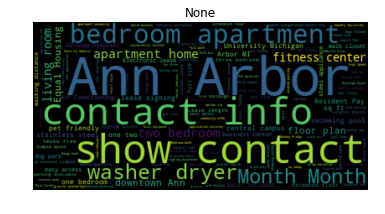

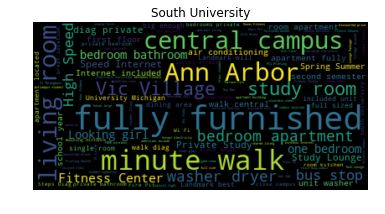

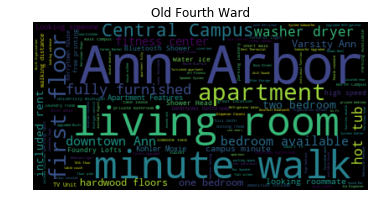

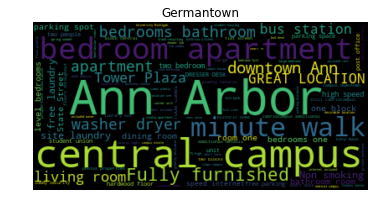

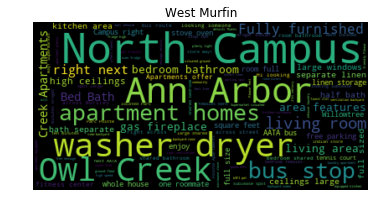

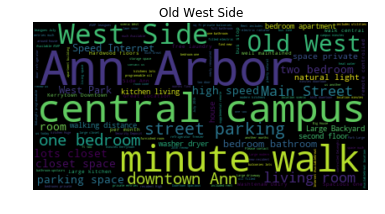

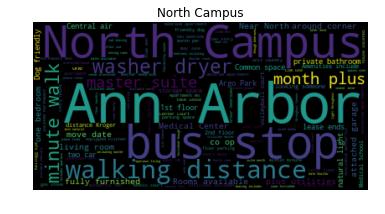

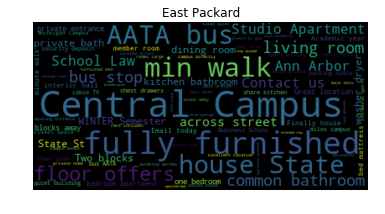

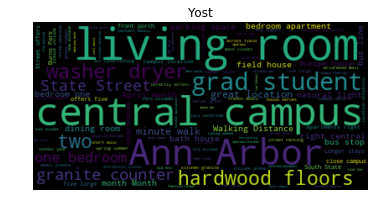

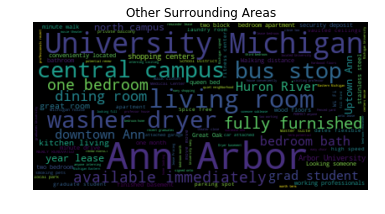

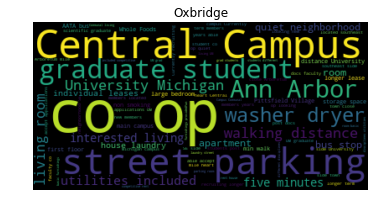

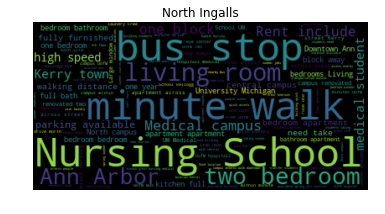

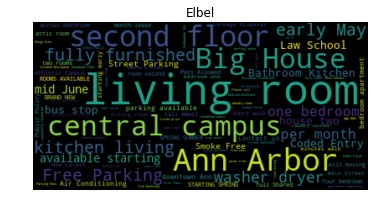

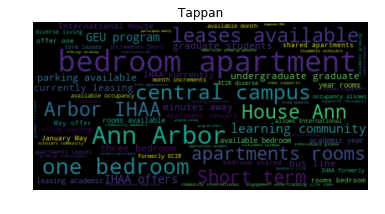

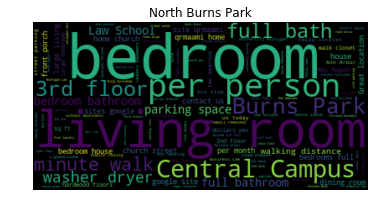

In [30]:
for word in textdic:
    wordcloud = WordCloud().generate(textdic[word])
    stri="./"+str(word)+".png"
    wordcloud.to_file(stri)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(word)
    plt.show()

In [22]:
aggregated['neighborhood'].unique()

array([None, 'South University', 'Old Fourth Ward', 'Germantown',
       'West Murfin', 'Old West Side', 'North Campus', 'East Packard',
       'Yost', 'Other Surrounding Areas', 'Oxbridge', 'North Ingalls',
       'Elbel', 'Tappan', 'North Burns Park'], dtype=object)

0
1
2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999


In [20]:
craigslist.head()

,address,price,bed,bath,area,company,neighborhood,laundry,pets,parking,utilities,property_type,year_built,description,images
0,3050 Birch Hollow Dr,1095,2.0,1.0,876,None,None,1,1,1,[],apartment,None,This bedroom apartments includes:\n\n→ Contemp...,[https://images.craigslist.org/00S0S_8ZkasrSZ6...
1,912 Rose Ave,2000,4.0,2.5,2000,None,None,1,1,1,[],house,None,"Stunning Ann Arbor home, perfect family house ...",[https://images.craigslist.org/00Y0Y_4tey2xf24...
2,None,695,3.0,2.0,0,None,None,1,0,1,[],apartment,None,"AWESOME Affordable. This stunning 3 bedroom, 1...",[]
3,1505 Natalie Lane near Kipling Drive,1385,1.0,1.0,800,None,None,1,1,1,[],apartment,None,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00p0p_1PnkFaSsW...
4,1505 Natalie Lane near Kipling Drive,1185,1.0,1.0,800,None,None,1,1,1,[],apartment,None,Have you heard about our Stars & Stripes progr...,[https://images.craigslist.org/00k0k_7n7PgfXF5...
